# Primer

This chapter is a quick refresher. You may *skip* this chapter and come back to it if you don't understand some code or concepts.

We review the **Python** syntax and commonly used structures and functions. We then discuss the **optimization** of functions and key ideas in **Probability** such as the central limit theorem and confidence intervals. 


## Code blocks and outputs

The notebook embeds code blocks and output.
For example, here's some sample Matplotlib code:

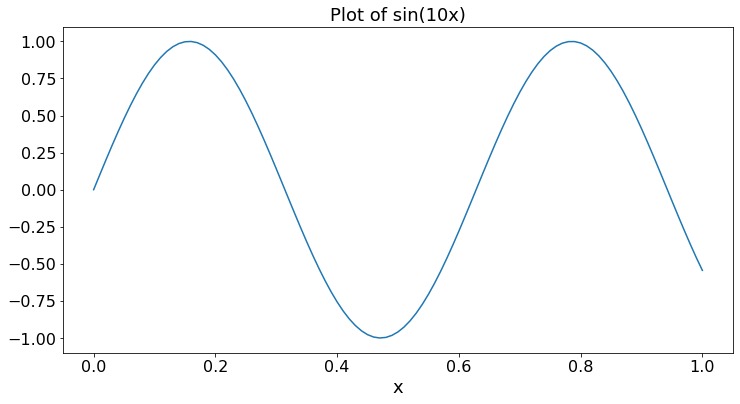

In [1]:
# First, we import some libraries

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
params = {'figure.figsize':(12,6), # These are plot parameters
         'xtick.labelsize': 16,
         'ytick.labelsize':16,
         'axes.titlesize':18,
         'axes.labelsize':18,
         'lines.markersize':4,
         'legend.fontsize': 20}
matplotlib.rcParams.update(params)
import scipy
import pandas as pd

# Here is the code itself:

X = 0.01*np.arange(101) # np.arange(N) is a list [0, 1, ..., N - 1]
Y = np.sin(10*X) # list of sin(10x) for x in X
plt.title('Plot of sin(10x)')
plt.xlabel('x')
plt.plot(X,Y)
plt.show()

To run the code, click the rocket symbol at the top of the page and select Live Code.

## 1.1. Python: basics


This notebook assumes that you run all the cells in sequence.  If some quantity is defined in one cell, it keeps its value in subsequent cells, unless it is redefined.

We start by importing some additional libraries.

In [2]:
from IPython.core.display import HTML
import math
import pandas as pd
import random
from ipywidgets import *

# run this cell

In [3]:
### list
A = [3.2, 4.5, -0.9, 6.1] # a list of 'floats'
A[0],A[2], len(A), A[-1], A[1:3], sum(A), round(sum(A),2),max(A), min(A), np.argmin(A) 
# run this cell
# Note that Python indexes start at 0, not 1

(3.2, -0.9, 4, 6.1, [4.5, -0.9], 12.899999999999999, 12.9, 6.1, -0.9, 2)

In [4]:
# It is sometimes useful to sort a list.  Here, we sort the list A by decreasing value of the sine of the element.
def bySine(x):
    return math.sin(x)
A.sort(key = bySine, reverse = True)
A

[3.2, 6.1, -0.9, 4.5]

### Exercise 1

Define a list A2 of 10 floats. Find the maximum, minimum, average.  Sort the list in increasing order.  

In [5]:
# if then else, for
x = 4
y = 9
print('Looking for the first element in A that is between x and y:')
if x >= y:
    print('- You should choose x < y')
else:
    found = False
    for n in range(len(A)): 
        if x < A[n] < y:
            found = True
            print('- The first such element has index ',n, ' and its value is ',A[n]) 
            break # break the loop
    if not found:
        print('- There is no such element')
# run this cell
# After that, change the values of x and y and try again

Looking for the first element in A that is between x and y:
- The first such element has index  1  and its value is  6.1


### Exercise 2

Write your own algorithm to sort the list A in increasing order; your algorithm can only use one compare operation per step.  Track the number of steps your algorithm takes.

In [6]:
# Applying a function to each element of a list
[round(a**2,3) for a in A]
# run this cell

[10.24, 37.21, 0.81, 20.25]

### Exercise 3

Write an algorithm to calculate the average value of $(a - mean)^4$ for the elements $a$ of the list $A$.
In this expression, $mean$ is the average of the elements $a$ in $A$.

In [7]:
# list of lists
M = [[2, 3, 1, 4],
    [5, 1, 0, 3],
    [7, -2, 3, 5]]
M[0][0], M[1][0], M[1][2] # M[0] is the first list in M, M[0][0] is the first element in the first list
M[1,2]
# run this cell and notice the error message

TypeError: list indices must be integers or slices, not tuple

In [ ]:
# You noticed that M[1,2] does not make sense
# To see the line numbers, click the cell and do 'esc, L'

sum(M[1])# sum the first row
# run this cell

### Exercise 4

Write your algorithm to find the indices $(i, j)$ for which $M[i][j]$ is the maximum value in the list of lists.

### Exercise 5

How do you find the sum of the first column of $M$?

In [ ]:
Q = np.array(M) # convert the list of lists into an array
print(Q)
# run this cell

In [ ]:
Q[0,0], Q[1,0], Q[1,2], sum(Q[1,:]), sum(Q[:,1])
# run this cell
# Note the indexing and summing a row or a column

### Exercise 6

How do you find the index of the row with the maximum sum?

In [ ]:
R = np.array([[-1, 2, 3],[0, 3, 1]]) # Careful about the brackets for the list of lists!
P = np.dot(R,Q) # This is the product of the matrices R and Q
P
# recall that the element [i, j] of P is the product of row i of R by column j of Q
# run this cell

### Exercise 7

Let 

$$M_1 = \left[ 
\begin{array}{c c}
3 & 2 \\
1 & 4
\end{array}
\right] \mbox{ and } $M_2 = \left[ 
\begin{array}{c c}
5 & 7 \\
2 & 1
\end{array}
\right].$$ 

Compare $M_1 M_2$ and $M_2M_1$.  

### Exercise 8

Define the **trace** $tr(M)$ of a square matrix $M$ as the sum of its diagonal elements.  Create two matrices (arrays) $U$ and $T$ that are $4 \times 6$ and $6 \times 4$, respectively.  Verify that $tr(TU) = tr(UT)$. Can you explain why?

In [ ]:
print('Recall that Q = ')
print(Q)
print('The maximum element of Q is ',np.max(Q))
am = np.argmax(Q)
print('The maximizing sequential index of Q is ', am, ', counting left to right and top to bottom')
print(' (starting from index 0)')
# The maximizing index of Q that of the concatenated list of row 0 followed by row 1 followed by row 2
i = int(am/4)
j = am - 4*int(am/4)
print('The maximizing (i,j) indices of Q are ',(i,j))  # [i,j] indices in the array of the maximizer
print('Q[i,j] = ',Q[i,j]) # checking that this yields np.max(Q)
# run this cell

### Exercise 9

Define a matrix $W$ that is $3$ by $5$.  Find the indices $(i, j)$ of the minimum element of $W$.

## Functions and their maximization

A real-valued function $f(.)$ defined on a set $D$ assigns a real number $f(x)$ to every $x$ in $D$.

The maximum of $f(\cdot)$ on $D$ is the largest of the elements $\{f(x), x \in D\}$. The maximizer of the function in $D$ is the value of $x$ such that $f(x)$ is the maximum of $f(\cdot)$ on $D$. The function $f(\cdot)$ is called  the **objective function** and the set $X$ is called the **admissible set**. 

In many cases, the set $D$ is defined via other functions.  For instance, if $g(.)$ and $h(.)$ are two real-valued function on a set $S$, one may define $D$ as the set of elements $x$ in $S$ such that $g(x) \leq a$ and $h(x) \leq b$ for some real numbers $a$ and $b$. In such a case, the conditions $g(x) \leq a$ and $h(x) \leq b$ are called the **constraints**.

Many problems involve finding the maximum of a function.  A brute-force way is to search systematically.

In [ ]:
def f(x):
    return 6000 - (x - 40)**2 - 5*x + 3
def g(x):
    return 10000 - 200*x + 0.1*(x - 50)**3
def h(x):
    return 2000*(1 + math.cos(0.05*(x + 30)))
N = 100
X = np.arange(N) # array of N zeros
F = [f(x) for x in X]
G = [g(x) for x in X]
H = [h(x) for x in X]
lbG = [2000 for x in X]
ubH = [3000 for x in X]
plt.plot(F,label = 'F')
plt.plot(G, label = 'G')
plt.plot(H, label = 'H')
plt.plot(lbG, label = '2000')
plt.plot(ubH, label = '3000')
plt.legend()
plt.show()
# run cell

In [ ]:
print('Let us look for the maximum of f such that g >= 2000 and h =< 3000') 
Z = min(F)
W = [F[x] - Z*(G[x] < 2000 or H[x] > 3000) for x in X] # W <= 0 outside the admissible set, W > 0 inside
# Note the penalty for violating the constraints.
x = np.argmax(W)
y = F[x]
if G[x] < 2000 or H[x] > 3000 == -1:
    print('No feasible value of x was found')
else:
    print('The answer is ', y, ' and the corresponding value of x is ', x)
        

Of course, this is very time-consuming if the set $X$ is very large. One should be aware that the shortness of the code does not imply that the algorithm is efficient!  In this case, the code evaluates the functions $f(.), g(.), h(.)$ for every element of $X$.  

### Exercise 10

Write an algorithm with **grid refinements** to solve the previous optimization problem. That is, find the maximum over a coarse grid as before, then find the maximum in a finer grid around the previous maximizer, and so on.

We will see more efficient methods when the functions have suitable properties such as linear or convex.

## Linear Program

The figure below illustrates the optimization problem when the objective function and the constraints are linear.

![title](Figures/LP1.pdf)

This figure shows an example where the possible values $x = [x[0], x[1]]$ of $X$ are two-dimensional vectors of real numbers. The objective function is $f(x) = c[0]x[0] + c[1]x[1]$.  There are six constraints:

$$A[i,0]x[0] + A[i,1]x[1] \leq b[i], i = 0, \ldots, 5.$$ 

Each constraint corresponds to a half-plane.  The blue set of admissible points where the $6$ constraints are satisfied is a polytope.  The picture makes it quite clear that the maximum of the function over the admissible set occurs at one of the vertices of the polytope.  Thus, instead of checking the values at all the admissible points (there are infinitely many of them!), it suffices to compute the values at the $6$ vertices and find the largest one. That is what the **simplex** algorithm does.

The cell below illustrates the algorithm for the following problem:

$$\mbox{Maximize } 2*x[0] + x[1]$$
$$\mbox{such that } x[0] - x[1] <= 5 $$
$$~~~~~~~~~~~~~~~~ - 0.5x[0] + x[1] <= 2 $$
$$~~~~~~~~~~~~~~~~~~~~ - (2/3)*x[0] - x[1] <= -4.$$




In [ ]:
# Linear Programming Example
print('We now run the simplex algorithm:')
from scipy.optimize import linprog
A = np.array([[1, -1],[-0.5, 1],[-2/3, -1]])
c = [-2, -1] # The algorithm minimizes cx, so it maximizes - cx = [2, 1]x
b = [5, 2, -4]
opt = linprog(c=c,A_ub = A, b_ub = b,method = "simplex")
opt
# run this cell
# The output gives the maximum of the function (fun) and the maximizer (x)

### Exercise 11

Try the previous algorithm on the following problem:

$$\mbox{Maximize } 2*x[0] + x[1]$$
$$\mbox{such that } x[0] + x[1] <= 5 $$
$$~~~~~~~~~~~~~~~~ x[0] - x[1] <= -2 $$
$$~~~~~~~~~~~~~~~~~~~~ - 2*x[0] + x[1] <= -6.$$

Can you explain what happened?  (Hint: Sketch the admissible set.)


### Gradient Algorithm

When the objective function is nonlinear, the maximum may occur in the interior of the admissible set.  The gradient algorithm is commonly used to find that maximum.  As an example, we look for the maximum of $f(n) = sin(x) - 0.8x$ for $x \in [0, 1]$.  Here is a graph of that function:

In [ ]:
X = 0.01*np.arange(100)
F = [math.sin(x) - 0.8*x for x in X]
plt.plot(X,F, label='f(x) = sin(x) - 0.8x')
plt.legend()
plt.show()
# run this cell

The gradient algorithm is as follows.  Let $x(n)$ be the value of $x$ after $n$ steps.  The next value is $x(n+1) = x(n) + a(n)*f'(x(n))$ where $f'(x)$ is the derivative of $f(x)$ and $a(n)$ is a positive number, called the step size, that decreases with $n$.  The basic idea is simple: if $f'(x(n)) > 0$, then the function is increasing at $x(n)$, so that the maximizer is larger than $x(n)$. Thus, one choose $x(n+1)$ larger than $x(n)$. The opposite is true if $f'(x(n)) < 0$.  The step sizes should decrease to avoid keeping overshooting or undershooting the maximizer.

There are rules for choosing the step sizes. Also, one has to make sure that $x(n+1)$ remains inside $[0, 1]$. Thus, a more precise algoorithm is
$$x(n+1) = \max\{0, \min\{1, x(n) + (10/(n+1))f'(x(n))\}\}.$$

In [ ]:
N = 20 # number of steps
X = np.zeros(N)
def fp(x): # derivative of f(x)
    return math.cos(x) - 0.8
for n in range(N-1):
    X[n+1] = max(0,min(1,X[n] + (10/(n+1))*fp(X[n])))
plt.plot(X,label='X[n]')
plt.legend()
plt.show()
print('After ',N,' steps, the algorithm finds x = ',round(X[N-1],3))

Choosing the number of steps is a bit tricky.  One method is to use a **stopping rule** based on the progress of the algorithm or on the value of the derivative.  For instance, one may decide to stop when $f'(x(n))$ is very small.  We try that approach below. To make sure the algorithm stops, we give up after $Nmax$ steps.

In [ ]:
X = [0.0] # X is a list that contains the float 0
Nmax = 10**4
epsilon = 10**(-4) # threshold on derivative for our stopping rule
def fp(x):
    return math.cos(x) - 0.8
more = True
while more and len(X) < Nmax: # stop when more == False or after Nmax steps
    derivative = fp(X[-1])
    X.append(max(0,min(1,X[-1] + (10/(n+1))*fp(X[-1]))))
    more = abs(derivative) > epsilon # keep trying until the derivative is less than epsilon
N = len(X)
plt.plot(X,label='X[n]')
plt.legend()
plt.show()
print('After ',N,' steps, the algorithm finds x = ',round(X[-1],3))

### Exercise 12

Try the previous algorithm with the step size $1/(n+1)$ instead of $10/(n+1)$.  

## 1.2 Probability

A key concepts in Probability is a **random experiment** defined by a set of **outcomes** and a **probability** attached to each outcome.  For instance, when you flip a fair coin, there are two outcomes ($H$ and $T$) and each outcome has probability $0.5$.  We write $P(H) = 0.5$ and $P(T) = 0.5$. If the coin is biased, one may have $P(H) = 0.6$ and $P(T) = 0.4$.  The probabilities of the different outcomes add up to one.  

A **random variable** is a real number $X(a)$ associated to each outcome $a$ of a random experiment. For instance, say that the radom experiment is flipping the biased coin defined above and $X(H) = 3, X(T) = 7$.  

One defines $P(X=x)$ as the probability that the value of the random varable is $x$.  For our biased coin, $P(X=3) = 0.6$ and $P(X = 7) = 0.4$.  The collection of pairs $(x, P(X=x))$ is called the **distribution** of $X$. (It is also called the probability mass function.)


The **expected value** $E(X)$ of a random variable $X$ is defined as the sum over the outcomes of the value of the random variable multiplied by its probability.  That is $E(X) = \sum_a X(a)P(a)$.  For our biased coin example, $E(X) = X(H)P(H) + X(T)P(T) = 3 \times 0.6 + 7 \times 0.4 = 4.6$.  

The **significance** of the expected value comes from the **Law of Large Numbers**. That law states that if we repeat the random experiment a large number $N$ of times, then the fraction of times $N(a)/N$ that the outcome is $a$ aproaches $P(a)$, where $N(a)$ is the number of times that the outcome is $a$.  That is $N(a)/N \approx P(a)$. Imagine we get $X(a)$ every time that the outcome is $a$. We then get $\sum_a aN(a)$ after $N$ experiment. Consequently, we get $(1/N) \sum_a aN(a) \approx \sum_a aP(a) = E(X)$ per experiment. Thus, the expected value is the average value per experiment, when we repeat the experiment a large number of times.

Some random variables take a **continuous** range of values. In such a case, think of the distribution of $X$ as defining $P(X \in (x, x + \epsilon))$ for all $x$, where $\epsilon$ is very small.  This probability is almost proportional to $\epsilon$, so that 

$$P(X \in (x, x + \epsilon)) \approx f(x)\epsilon.$$ 

We call $f(\cdot)$ the **probability density function (pdf)** of $X$.  

One example is the **uniform** distribution on $[0, 1]$ defined by $f(x) = 1$ for $x \in [0, 1]$ and $f(x) = 0$ otherwise. Intuitively, that random variable is equally likely to take any value in $[0, 1]$. Another example is the **standard Gaussian** or **normal** random variable defined by 

$$f(x) = (1/\sqrt{2 \pi}) \exp\{- x^2/2\}.$$ 

Note that $E(X) = \sum_n n \epsilon P(X \in [n \epsilon, n \epsilon + \epsilon])$ Hence, $$E(X) =  \sum_n n \epsilon f(n \epsilon) \epsilon = \int x f(x) dx.$$

With Python we can easily visualize random variables.

In [ ]:
N = 100
X = np.arange(N)
B = [np.random.binomial(1,0.6) for n in range(N)]
U = [np.random.uniform(0,1) for n in range(N)]
G = [np.random.normal(0,1) for n in range(N)]
plt.scatter(X,B,label='G')
plt.scatter(X,U,label='U')
plt.scatter(X,G,label='G')
plt.legend()
plt.show()


In [ ]:
from scipy.stats import norm
## One can plot the probability density function of the continuous random variables U and G as follows.
Val = [0.04*n - 2 for n in X] # values of random variable
pdfU = [(0 <= x and x <= 1) for x in Val]  # probability density of U at those values
pdfG = [norm.pdf(x) for x in Val] # probability density of G at those values
plt.plot(Val,pdfU,label='pdfU')
plt.plot(Val,pdfG,label='pdfG')
plt.legend()
plt.show()

In [ ]:
# We can verify the law of large number
def sampleMean(A):
    M = np.zeros(len(A))
    M[0] = A[0]
    for n in range(1,len(A)):
        M[n] = (n*M[n-1] + A[n])/(n+1)
    return M
for A in [B,U,G]:
    M = sampleMean(A)
    plt.plot(M)
plt.show()
# Note that the sample means approach 0.6, 0.5, 0 which are the expected values of the three random variables.

The sample mean converges faster if the distribution is less spread out. For instance, define a random variable that is uniform on $[0.4, 0.6]$.  Its expected value is $0.5$, like that of a uniform random variable on $[0, 1]$, but it is less spread out.  We expect the sample mean to converge faster.  

In [ ]:
U2 = [np.random.uniform(0.4,0.6) for n in range(N)]
for A in [U,U2]:
    M = sampleMean(A)
    plt.plot(M)
plt.show()

### Exercise 13

Consider the experiment of rolling a balanced die with outcomes $\{1, 2, \ldots, 6\}$.  Verify the law of large numbers for that experiment.

### Exercise 14

Let $P = [p_0, \ldots, p_{n-1}]$ be a list of $n$ positive numbers that add up to one. Create a function $pick(U,P)$ for $U \in [0, 1]$ that returns the value $0$ when $U < p_0$ and the value $m$ when $p_0 + \cdots + p_{m-1} < U < p_0 + \cdots + p_m$.  

Argue that, if $U$ is random and uniform in $[0, 1]$, then $pick(U,P)$ takes the value $m$ with probability $p_m$ for $m \in \{0, \ldots, n-1\}$.

## Central Limit Theorem

The spread of a distribution is measured by its **variance** defined as $var(X) = E((X - E(X))^2)$. Intuitively, this quantity evaluates how much $X$ tends to differ from $E(X)$.  The **standard deviation** is defined as the square root of the variance. That is $SD(X) = \sqrt{var(X)}$.  For the examples above, one has 

$$SD(U) = 1/sqrt{12} \approx 0.3, SD(U2) = 0.2 SD(U) \approx 0.06, SD(B) = , SD(G) = 1.$$  

Think of $SD(X)$ as the typical deviation from $E(X)$.

When properly scaled, the average of random variables approach a standard Gaussian random variable.  Specifically, say that $X_1, \ldots, X_n$ are the values from repeated experiments of a random variable $X$, then

$$\frac{X_1 + \cdots + X_n - nE(X)}{SD(X) \sqrt{n}} \approx G$$

where $G$ is a standard Gaussian random variable.

We verify the CLT by plotting the fraction of the scaled averages of the random variables U, B, G that fall in diffent intervals of $[-2, 2]$.  Specifically, we repeat the following experiment $1000$ times: Generate $N$ random variables and compute their scaled average; count the fraction of those scaled averages that fall in intervals of $[-3, 3]$.

In [ ]:
N = 1000
K = 100
M = 20 # number of intervals in [-3, 3]: [-3,-3 +6/M), [-3 +4/M, -3 + 2*6/M), ..., [-3 + 19*6/M, 2)
X = [-3 + n*6/M for n in range(M)]
def scale(A,mean,std):
    n = len(A)
    return (sum(A) - n*mean)/(std*n**(0.5))
FU = np.zeros(M)
FB = np.zeros(M)
FG = np.zeros(M)
SDU = (12)**(-0.5)
SDB = (0.6*0.4)**(0.5)
SDG = 1
for k in range(K):
    B = [np.random.binomial(1,0.6) for n in range(N)]
    x = scale(B,0.6,SDB)
    n = int(M*(x - 3)/6) # identifies the interval in which x falls
    FB[n] += 1/K
    U = [np.random.uniform(0,1) for n in range(N)]
    x = scale(U,0.5,SDU) 
    n = int(M*(x - 3)/6) # identifies the interval in which x falls
    FU[n] += 1/K
    G = [np.random.normal(0,1) for n in range(N)]
    x = scale(G,0,SDG)
    n = int(M*(x - 3)/6) # identifies the interval in which x falls
    FG[n] += 1/K
pdfG = [norm.pdf(x)*6/M for x in X]
plt.scatter(X,FB,label='B')
plt.scatter(X,FU,label='U')
plt.scatter(X,FG,label='G')
plt.plot(X,pdfG,label='pdfG')
plt.legend()
plt.show()

    

The probability that a standard Gaussian random variable falls in the interval $[-2.6, 2.6]$ is approximately $90\%$.  Combining this fact with the CLT, we conclude that the probability that the scaled average of $N$ random variables falls in that interval is also about $90\%$.  Thus,

$$P\left(-2.6 \leq \frac{X_1 + \cdots + X_n - nE(X)}{SD(X) \sqrt{n}} \leq 2.6\right) \approx 0.9.$$

Equivalently,

$$P\left( E(X) \in \left[ AV(X) - 2.6 SD(X)/\sqrt{n}, AV(X) + 2.6 SD(X)/\sqrt{n} \right] \right) \approx 0.9$$

where $AV(X) = (X_1 + \cdots + X_n)/n$ is the **sample average** of the random values.

One says that the interval in the above expression is the $90\%$ **confidence interval** for the mean $E(X)$ of the random variables.  

In practice, if $STD(X)$ is not known, one can generally replace it by 
the **sample standard deviation** $SSD(X)$ defined as

$$SSD(X)^2 = \frac{1}{n} \left( (X_1 - AV(X))^2 + \cdots + (X_n - AV(X))^2 \right).$$ 

Note that $SSD(X)$ is essentially $E(X - E(X))^2 = VAR(X)$, but the law of large numbers.
 
Let us check with our examples.

In [ ]:
N = 1000
K = 100
def sampleAverageAndSD(A):
    n = len(A)
    ave = sum(A)/n
    S = [(a - ave)**2 for a in A]
    std = (sum(S)/n)**(0.5)
    return ave, std  
def test(mean,ave,std):
    return (ave - 2.6*std/(N**(0.5)) <= mean and mean <= ave + 2.6*std/(N**(0.5)))
CU = 0
CB = 0
CG = 0
SDU = (12)**(-0.5)
SDB = (0.6*0.4)**(0.5)
SDG = 1
for k in range(K):
    B = [np.random.binomial(1,0.6) for n in range(N)]
    ave, std = sampleAverageAndSD(B)
    CB += test(0.6,ave,std)/K
    U = [np.random.uniform(0,1) for n in range(N)]
    ave, std = sampleAverageAndSD(U)
    CU += test(0.5,ave,std)/K
    G = [np.random.normal(0,1) for n in range(N)]
    ave, std = sampleAverageAndSD(G)
    CG += test(0,ave,std)/K
print('The fraction of times that the mean falls in the confidence interval is')
print(round(CB,3),' for B; ',round(CU,3),' for U; ',round(CG,3),' for G.')


### Exercise 15

Repeat the previous cells for the experiment of rolling a balanced die.

### Exercise 16

Repeat the previous cells when the experiment yields the outcome $m$ with probability $p_m$ for $m \in \{0, \ldots, n-1\}$ where the $p_m$ are positive and add up to one.

### Chi-Square Goodness-Of-Fit Test

The plot above shows that the sample distribution of the scaled averages $FB$ of Bernoulli trials looks very close to the Gaussian distribution.  We use a statistical test called chi square to measure the goodness of fit.  The idea is to bin the observed values into intervals and to compare the observed count $O_k$ in the $k$-th interval with the expected number $E_k$ in that interval if the observations were from a Gaussian distribution.  If these numbers are similar, it is plausible that the observations are consistant with a Gaussian distribution.  The relevant measure of differences is 
$Z = \sum_k (O_k - E_k)^2/E_k$. When there are many observations, if the observations come from a Gaussian distribution, the distribution of $Z$ is approximately chi square. Thus, one can calculate the likelihood that the computed $Z$ is consistent with a Gaussian distribution. If that value, called the $p$-value, is very small we should reject that hypothesis: the fit is not good. 

In [ ]:
from scipy.stats import chisquare
observed_values = FB
expected_values = [norm.pdf(-3 + n*6/M)*6/M for n in range(M)]
c , p = chisquare(observed_values, expected_values,ddof = 3)
print('The p-value is ',round(p,3),'.')
if p > 0.05:
    print('You cannot reject the possibility that the sample values come from a Gaussian distribution')
else:
    print('You should reject the possibility that the sample values come from a Gaussian distribution')

### Exercise 17

Perform the Chi-Square test on the examples of Exercises 15 and 16.

## 1.3 Pandas

Pandas is a toolkit to manipulate dataframes that are essentially spreadsheets.  One can import and export from Excel, so Pandas provides a simple way to manipulate large data sets.

The cell below shows how to use pandas to create a table of values of the Gaussian distribution with mean zero and variance one (the standard Gaussian distribution).  Specifically, the table displays the values of x such that $P(SG \leq x) = 0.005, 0.01, 0.05,$ or $0.1$, where $SG$ is a standard Gaussian random variable.  The code uses the 'inverse' cdf of the SG random variable.

In [ ]:
COLUMNS = ['x','P(SG < x)']
SGvalues = pd.DataFrame(columns=COLUMNS) # create DataFrame with indicated columns
Values = [0.005,0.01,0.05,0.1]
vals = norm.ppf(Values, 0) # here, 0 is the mean - find inverse CDF of standard Gaussian
SGvalues.loc[:,'x'] = vals # set column 'x' to vals
SGvalues.loc[:,'P(SG < x)'] = Values # set column 'P(SG < x)' to Values
blankIndex=[''] * len(SGvalues) # prepare blank index
SGvalues.index = blankIndex # set index to blank index
print(SGvalues) # print DataFrame  

The cell below shows how to read individual cells in the DataFrame. You can set these values in the same way.

In [ ]:
# We recreate the DataFrame, but we keep its index
COLUMNS = ['x','P(SG < x)']
SGvalues = pd.DataFrame(columns=COLUMNS) # create DataFrame with indicated columns
Values = [0.005,0.01,0.05,0.1]
vals = norm.ppf(Values, 0) # here, 0 is the mean - find inverse CDF of standard Gaussian
SGvalues.loc[:,'x'] = vals # set column 'x' to vals
SGvalues.loc[:,'P(SG < x)'] = Values # set column 'P(SG < x)' to Values
print('The DataFrame with its index:')
print(SGvalues) # print DataFrame  
print('Selected searches:')
print('Value in cell [2,1] = ', SGvalues.iloc[2,1]) # read cell [2,1]
print('Value in cell [0,x] = ',SGvalues.at[0,'x']) # read cell with row index 0 and column 'x'
print('Indices n where value in cell [n, P(SG <x)] = 0.01: ', SGvalues[SGvalues['P(SG < x)'] == 0.01].index.tolist()) # find row indices where the 'P(SG < x)' value is 0.01